In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import regex
from nltk.corpus import stopwords
import nltk
import re
import string
from sklearn.manifold import TSNE

In [2]:
train=pd.read_csv('../input/nlp-getting-started/train.csv')

In [3]:
train.head(4)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1


In [4]:
train.shape

(7613, 5)

In [5]:
train=train[['text','target']]

In [6]:
train.isnull().sum()

text      0
target    0
dtype: int64

In [7]:
train.shape

(7613, 2)

In [8]:
#remove duplicate column from the data
train=train.drop_duplicates(subset='text')

In [9]:
train.shape

(7503, 2)

In [10]:
train=train.dropna()

# Word2vec library to predict the model

In [11]:
corpus_text='\n'.join(train[:500]['text'])
sentences = corpus_text.split('\n')
sentences = [line.lower().split(' ') for line in sentences]
def clean(s):
    return [w.strip(',."!?:;()#\'') for w in s]
sentences = [clean(s) for s in sentences if len(s) > 0]
model=Word2Vec(sentences,size=100, window=5, min_count=3, workers=4)

In [12]:
print(model)

Word2Vec(vocab=450, size=100, alpha=0.025)


In [13]:
vectors = model.wv
del model

In [19]:
def tsne_plot(vectors):
    #creat tsne model and plot it
    labels=[]
    tokens=[]
    for word in vectors.vocab:
        tokens.append(vectors[word])
        labels.append(word)
    tsne_model=TSNE(perplexity=40,n_components=2,init='pca',n_iter=2000,random_state=0)
    new_values=tsne_model.fit_transform(tokens)
    x=[]
    y=[]
    for value in new_values:
        x.append(value[1])
        y.append(value[0])
    plt.figure(figsize=(16,16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],xy=(x[i],y[i]),xytext=(5,2),textcoords='offset points',ha='right',va='bottom')
    plt.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


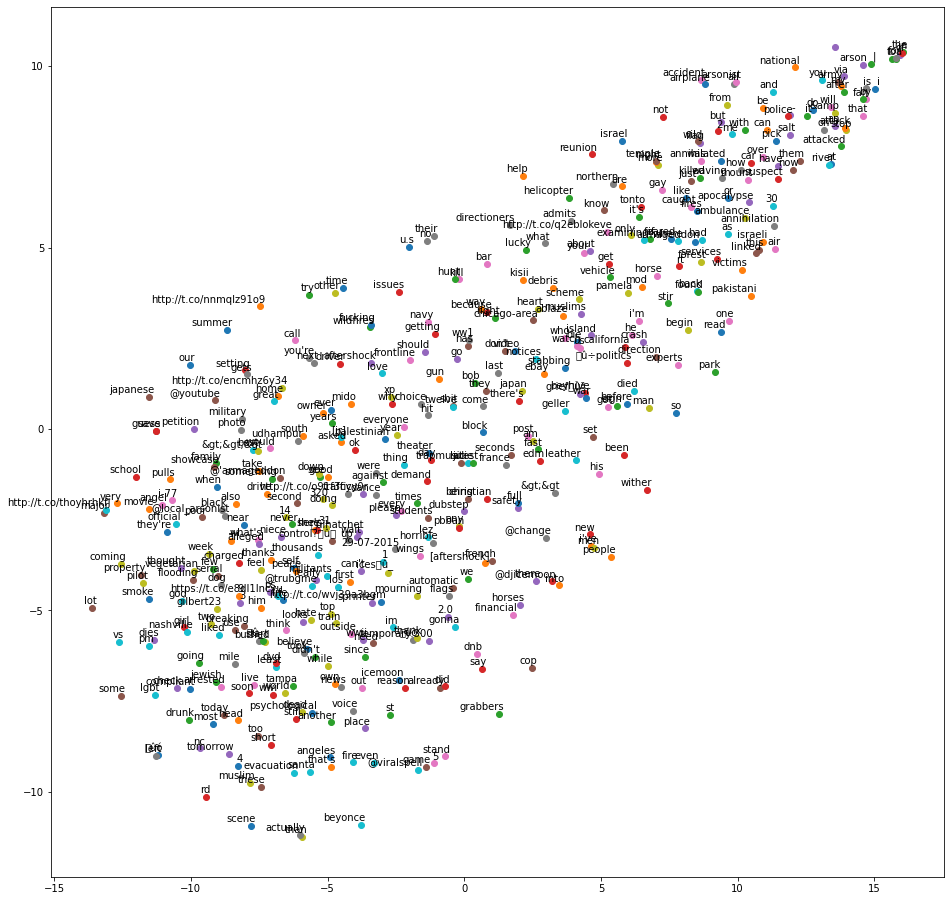

In [20]:
tsne_plot(vectors)

In [21]:
vectors.most_similar('people')

[('i', 0.6944476962089539),
 ('will', 0.6864601373672485),
 ('of', 0.6770997047424316),
 ('army', 0.6762412786483765),
 ('a', 0.675310492515564),
 ('with', 0.6695268154144287),
 ('national', 0.6692184209823608),
 ('in', 0.6671736836433411),
 ('for', 0.6661921739578247),
 ('my', 0.6640123128890991)]

In [22]:
vectors['all']

array([ 6.1977031e-03,  8.0371667e-03, -7.3979083e-03, -1.5541575e-03,
        4.4522956e-03,  3.6450927e-03,  5.3351652e-03,  3.0428013e-03,
       -6.2253885e-03,  4.7840574e-03, -4.7931271e-03, -1.3340457e-02,
        3.1266278e-03, -7.6916614e-03, -1.5279951e-02,  1.1944135e-02,
        1.9108582e-03, -1.4449280e-02, -4.0831291e-03,  3.2754710e-03,
        3.6938314e-03,  1.2656279e-02,  1.1286513e-03,  8.7836180e-03,
       -1.1556562e-03,  1.2753237e-03, -5.9713321e-03, -6.3835583e-03,
        2.7508862e-04,  3.9209216e-03,  1.0030817e-03,  1.0919216e-03,
        2.0350018e-03,  4.4639469e-03, -3.1300990e-03, -4.7779139e-03,
       -8.6359689e-03,  1.3660068e-03, -4.3996461e-03, -9.3361951e-04,
       -5.1096221e-03, -6.6512027e-03,  4.1775531e-03, -5.1450497e-03,
        3.0396781e-03,  8.4376941e-03, -1.0088741e-02, -2.4407034e-04,
        3.3382613e-03, -1.3830842e-03, -8.0414367e-04, -8.0951601e-03,
        6.7607709e-03,  4.7385111e-03, -7.7425367e-03,  5.0822929e-03,
      

cosine simlarity

In [28]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = vectors.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1])
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [33]:
nearest_similarity_cosmul("police", "call", "help")


police is related to call, as feared is related to help


'feared'

In [35]:
nearest_similarity_cosmul("people", "with", "national")

people is related to with, as so is related to national


'so'

In [36]:
# Submission
submission = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
submission.to_csv("submission.csv", index=False)

**if it is use full please upote**